### XICOR Correlation

**xicorrelation** calculates a new coefficient which indicates *the degree of dependence* between X and Y, i.e. **"how much Y is a function of X"**.

This new measure $\xi$ **equals 0 if and only if the two variables are independent, 1 if and only if one variable is a function of the other**, and lastly has some nice theoretical properties allowing for hypothesis testing while practically making no assumptions about the data.

#### Without Ties:

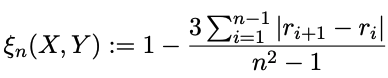

Where $r_{i}$ is the rank of $Y_{i}$, that is the number $j$ such that $Y_{j} \leq Y_{i}$.


#### With Ties:

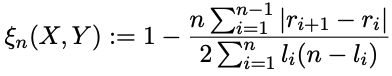

Where $r_{i}$ is the rank of $Y_{i}$, that is the number $j$ such that $Y_{j} \leq Y_{i}$, and $l_{i}$ is the number $j$ such that $Y_{j} \geq Y_{i}$, which breaks the ties uniformly at random.

*Please note that this coefficient is not symmetric, meaning that $\xi(X,Y) \neq \xi(Y,X)$*.

*xicorrelation package* implements xi correlation formula proposed in https://arxiv.org/pdf/1909.10140.pdf

The purpose of this notebook is to test this coefficient over monotonic and non-monotonic relations, and also how can it be used to infer the strenght of "causality" between variables.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xicorrelation import xicorr
from scipy import stats

### Monotonic Relations

#### Linear with Noise

XiCorrResult(correlation=0.6753657649049025, pvalue=0.0)
PearsonRResult(statistic=0.9421555497007126, pvalue=4.491181072935361e-286)


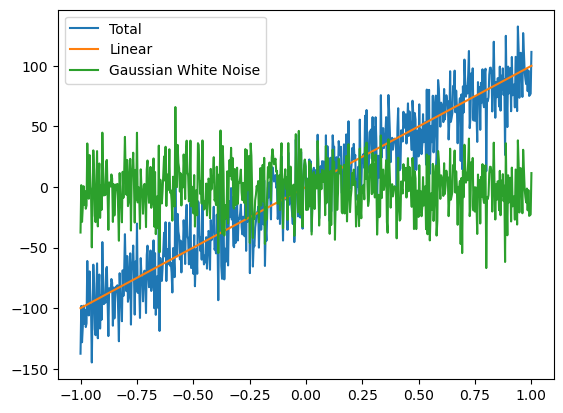

In [24]:
x = np.linspace(-1, 1, num=600)
n = np.random.normal(scale=20, size=x.size)
s = 100 * np.power(x,1)
y = 100 * np.power(x,1) + n

plt.Figure(figsize=(1, 1.5), dpi=80)
plt.plot(x, y, label='Total')
plt.plot(x, s, label='Linear')
plt.plot(x, n, label='Gaussian White Noise')
plt.legend()

# XICOR API
res_xicor = xicorr(x, y)
print(res_xicor)

# Pearson Correlation coefficient
res_pearson = stats.pearsonr(x, y)
print(res_pearson)

#### Exponential with Noise

XiCorrResult(correlation=0.6066155739321498, pvalue=0.0)
PearsonRResult(statistic=0.8957432660975133, pvalue=1.0721457792154911e-212)


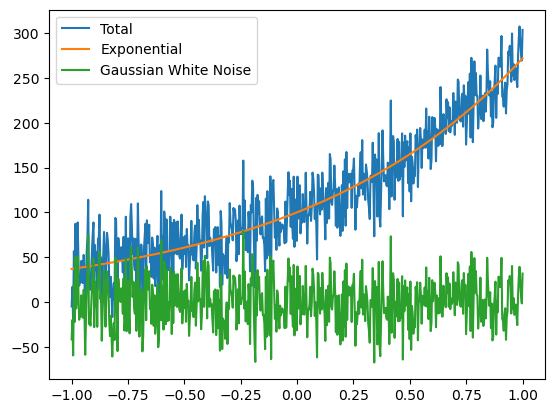

In [25]:
x = np.linspace(-1, 1, num=600)
n = np.random.normal(scale=25, size=x.size)
s = 100 * np.exp(x)
y = 100 * np.exp(x) + n

plt.Figure(figsize=(1, 1.5), dpi=80)
plt.plot(x, y, label='Total')
plt.plot(x, s, label='Exponential')
plt.plot(x, n, label='Gaussian White Noise')
plt.legend()

# XICOR API
res_xicor = xicorr(x, y)
print(res_xicor)

# Pearson Correlation coefficient
res_pearson = stats.pearsonr(x, y)
print(res_pearson)

#### Log with noise

XiCorrResult(correlation=0.6106072516868102, pvalue=0.0)
PearsonRResult(statistic=0.8853866562969387, pvalue=4.1891273206649544e-201)


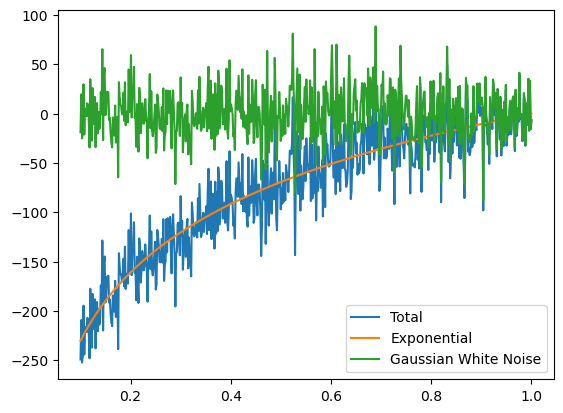

In [29]:
x = np.linspace(0.1, 1, num=600)
n = np.random.normal(scale=25, size=x.size)
s = 100 * np.log(x)
y = 100 * np.log(x) + n

plt.Figure(figsize=(1, 1.5), dpi=80)
plt.plot(x, y, label='Total')
plt.plot(x, s, label='Exponential')
plt.plot(x, n, label='Gaussian White Noise')
plt.legend()

# XICOR API
res_xicor = xicorr(x, y)
print(res_xicor)

# Pearson Correlation coefficient
res_pearson = stats.pearsonr(x, y)
print(res_pearson)

### Non-Monotonic Relations

#### Positive Cuadratic with Noise

XiCorrResult(correlation=0.7087491909699749, pvalue=0.0)
PearsonRResult(statistic=0.013877893769323888, pvalue=0.734425142798196)


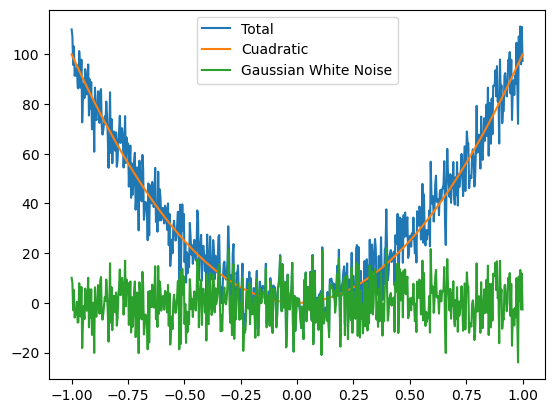

In [30]:
x = np.linspace(-1, 1, num=600)
n = np.random.normal(scale=8, size=x.size)
s = 100 * np.power(x,2)
y = 100 * np.power(x,2) + n

plt.Figure(figsize=(1, 1.5), dpi=80)
plt.plot(x, y, label='Total')
plt.plot(x, s, label='Cuadratic')
plt.plot(x, n, label='Gaussian White Noise')
plt.legend()

# XICOR API
res_xicor = xicorr(x, y)
print(res_xicor)

# Pearson Correlation coefficient
res_pearson = stats.pearsonr(x, y)
print(res_pearson)

#### Sine Wave with Noise

XiCorrResult(correlation=0.865666293517482, pvalue=0.0)
PearsonRResult(statistic=-0.15074530459333224, pvalue=0.00021056762247854556)


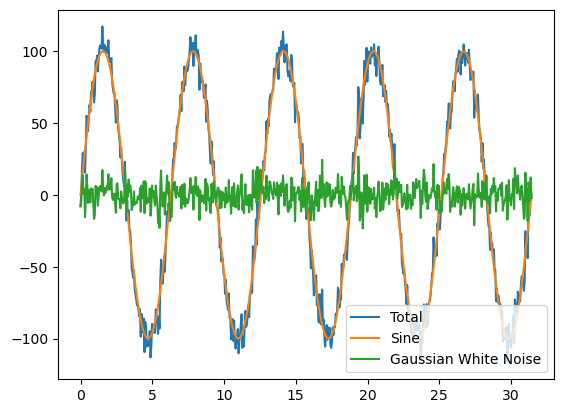

In [31]:
x = np.linspace(0, 10 * np.pi, num=600)
n = np.random.normal(scale=8, size=x.size)
s = 100 * np.sin(x)
y = 100 * np.sin(x) + n

plt.Figure(figsize=(1, 1.5), dpi=80)
plt.plot(x, y, label='Total')
plt.plot(x, s, label='Sine')
plt.plot(x, n, label='Gaussian White Noise')
plt.legend()

# XICOR API
res_xicor = xicorr(x, y)
print(res_xicor)

# Pearson Correlation coefficient
res_pearson = stats.pearsonr(x, y)
print(res_pearson)

#### ArcSine Wave with Noise

XiCorrResult(correlation=-0.057236270100750275, pvalue=0.9866794777012822)
PearsonRResult(statistic=-0.1579417990530017, pvalue=0.00010228285042330417)


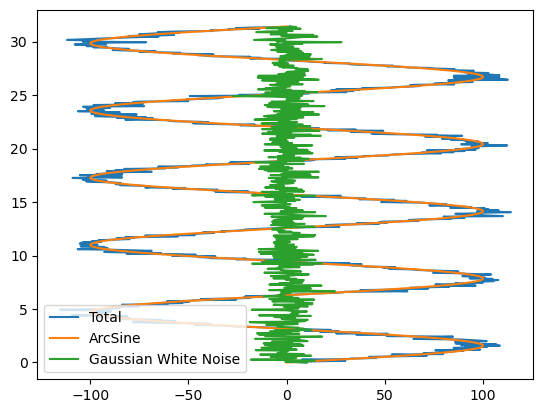

In [41]:
x = np.linspace(0, 10 * np.pi, num=600)
n = np.random.normal(scale=8, size=x.size)
s = 100 * np.sin(x) 
y = 100 * np.sin(x) + n

plt.Figure(figsize=(1, 1.5), dpi=80)
plt.plot(y, x, label='Total')
plt.plot(s, x, label='ArcSine')
plt.plot(n, x, label='Gaussian White Noise')
plt.legend()

# XICOR API
res_xicor = xicorr(y, x)
print(res_xicor)

# Pearson Correlation coefficient
res_pearson = stats.pearsonr(y, x)
print(res_pearson)

*Note*: Y as a function of X shows a **xicor = 0.8657**, but X as a function of Y shows a **xicor = -0.0168**